In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

* Data Load

In [4]:
ppg_signal_5 = np.load('workspace/old_data/ica_ppg_signal_5.npy') # 5 min ppg

In [5]:
ecg_signal_5 = np.load('workspace/old_data/ica_ecg_signal_5.npy') # 5 min ecg

In [7]:
ppg_lb = np.load('workspace/old_data/ica_ppg_lb.npy')

In [8]:
ecg_lb = np.load('workspace/old_data/ica_ecg_lb.npy')

In [9]:
ppg_id = np.load('workspace/old_data/ica_ppg_id.npy')

In [10]:
ecg_id = np.load('workspace/old_data/ica_ecg_id.npy')

* ppg dataframe

In [11]:
df_ppg = pd.DataFrame(list(ppg_signal_5))

In [12]:
df_ppg['caseid'] = list(ppg_id)

In [13]:
df_ppg['label'] = list(ppg_lb)

In [14]:
df_ppg = df_ppg.dropna()

* ecg dataframe

In [15]:
df_ecg = pd.DataFrame(list(ecg_signal_5))

In [16]:
df_ecg['caseid'] = list(ecg_id)

In [17]:
df_ecg['label'] = list(ecg_lb)

In [18]:
df_ecg = df_ecg.dropna()

* concat df

In [19]:
len(list(set(df_ppg['caseid'])))

193

In [20]:
len(list(set(df_ecg['caseid'])))

206

In [21]:
len(list(set(df_ppg['caseid'])&set(df_ecg['caseid'])))

193

In [22]:
in_id = list(set(df_ppg['caseid'])&set(df_ecg['caseid']))

In [23]:
df_ecg['check'] = df_ecg['caseid'].map(lambda x : x in in_id)

In [24]:
df_ecg = df_ecg[df_ecg['check'] == True]

In [25]:
df_ecg = df_ecg.dropna()

In [26]:
df_ecg = df_ecg.drop('check', axis=1)

* quality index

* visualize

In [80]:
import matplotlib.pylab as plt

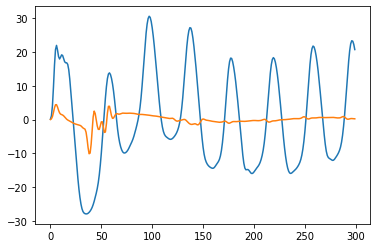

In [81]:
plt.plot(df_ppg_bp_sig[0])
plt.plot(df_ecg_bp_sig[0])

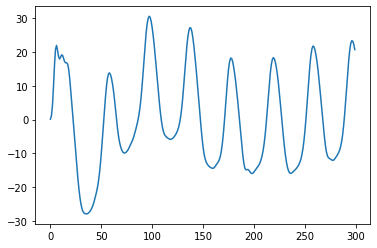

In [82]:
plt.plot(df_ppg_bp_sig[0])

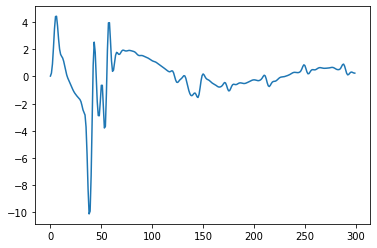

In [83]:
plt.plot(df_ecg_bp_sig[0])

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dropout, Conv1D, GlobalMaxPooling1D, Dense, BatchNormalization, ReLU, MaxPool1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras import layers

In [85]:
X_train = [df_ppg_bp_sig, df_ecg_bp_sig]

In [86]:
y_train = list(df_ppg['label'].map(lambda x : 0 if x == 0 else 1))

In [87]:
X_train = np.asarray(df_ppg_bp_sig)
y_train = np.asarray(y_train)

In [88]:
len(X_train)

638

In [89]:
len(y_train)

638

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
train_data, valid_data, train_labels, valid_labels = train_test_split(
    X_train, y_train, test_size=0.3, random_state=21
)

In [93]:
valid_data, test_data, valid_labels, test_labels = train_test_split(
    valid_data, valid_labels, test_size=0.5, random_state=21
)

In [96]:
# minmaxnormalization
min_tra = tf.reduce_min(np.float32(train_data))
# max
max_tra = tf.reduce_max(np.float32(train_data))
# min
min_val = tf.reduce_min(np.float32(valid_data))
# min
max_val = tf.reduce_max(np.float32(valid_data))

min_tes = tf.reduce_min(np.float32(test_data))
# min
max_tes = tf.reduce_max(np.float32(test_data))

In [97]:
train_data = (train_data - min_tra) / (max_tra - min_tra)
valid_data = (valid_data - min_val) / (max_val - min_val)
test_data = (test_data - min_tes) / (max_tes - min_tes)

train_data = tf.cast(train_data, tf.float32)
valid_data = tf.cast(valid_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [98]:
len(train_data), len(valid_data)

(446, 96)

In [99]:
len(valid_data), len(test_data)

(96, 96)

* model1

In [100]:
model = Sequential()
# conv1
model.add(Conv1D(64, 10, padding='valid', strides=1,input_shape=(300, 1)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPool1D(2,strides=2))
model.add(Dropout(0.3))

# conv2
model.add(Conv1D(128, 16, padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPool1D(2,strides=2))
model.add(Dropout(0.3))

# conv3
model.add(Conv1D(128, 16, padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPool1D(2,strides=2))
model.add(Dropout(0.3))

# conv4
model.add(Conv1D(128, 16, padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPool1D(2,strides=2))
model.add(Dropout(0.3))

# conv5
model.add(Conv1D(64, 16, padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPool1D(2,strides=2))
model.add(Dropout(0.3))

# conv6
model.add(Conv1D(32, 16, padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPool1D(2,strides=2))
model.add(Dropout(0.3))

# conv6
model.add(Conv1D(32, 16, padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPool1D(2,strides=2))
model.add(Dropout(0.3))

model.add(GlobalMaxPooling1D())
model.add(Dense(320))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [101]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_17 (Conv1D)          (None, 291, 64)           704       
                                                                 
 batch_normalization_17 (Bat  (None, 291, 64)          256       
 chNormalization)                                                
                                                                 
 re_lu_17 (ReLU)             (None, 291, 64)           0         
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 145, 64)          0         
 g1D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 145, 64)           0         
                                                                 
 conv1d_18 (Conv1D)          (None, 145, 128)         

In [102]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [103]:
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
#mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [104]:
history = model.fit(train_data, train_labels, epochs=500, validation_data=(test_data, test_labels))

Epoch 1/500
14/14 [==============================] - 1s 18ms/step - loss: 0.7921 - acc: 0.6009 - val_loss: 0.6865 - val_acc: 0.7708
Epoch 2/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6696 - acc: 0.6300 - val_loss: 0.6423 - val_acc: 0.7708
Epoch 3/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6888 - acc: 0.6502 - val_loss: 0.6249 - val_acc: 0.7708
Epoch 4/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6705 - acc: 0.6413 - val_loss: 0.6128 - val_acc: 0.7708
Epoch 5/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6841 - acc: 0.6614 - val_loss: 0.6034 - val_acc: 0.7708
Epoch 6/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6473 - acc: 0.6435 - val_loss: 0.5913 - val_acc: 0.7708
Epoch 7/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6451 - acc: 0.6682 - val_loss: 0.5891 - val_acc: 0.7708
Epoch 8/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6455 - 

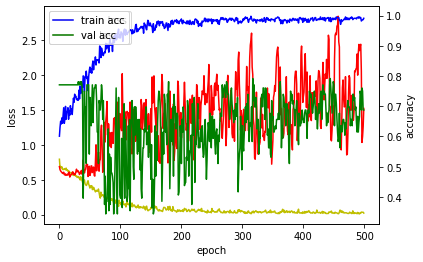

In [105]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

* model2

In [106]:
model = Sequential()
# conv1
model.add(Conv1D(64, 10, padding='valid', strides=1,input_shape=(300, 1)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPool1D(2,strides=2))
model.add(Dropout(0.3))

# conv2
model.add(Conv1D(128, 16, padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPool1D(2,strides=2))
model.add(Dropout(0.3))

# conv3
model.add(Conv1D(128, 16, padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPool1D(2,strides=2))
model.add(Dropout(0.3))

model.add(GlobalMaxPooling1D())
model.add(Dense(320))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [107]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 291, 64)           704       
                                                                 
 batch_normalization_24 (Bat  (None, 291, 64)          256       
 chNormalization)                                                
                                                                 
 re_lu_24 (ReLU)             (None, 291, 64)           0         
                                                                 
 max_pooling1d_24 (MaxPoolin  (None, 145, 64)          0         
 g1D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 145, 64)           0         
                                                                 
 conv1d_25 (Conv1D)          (None, 145, 128)         

In [108]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [109]:
history = model.fit(train_data, train_labels, epochs=500, validation_data=(test_data, test_labels))

Epoch 1/500
14/14 [==============================] - 1s 9ms/step - loss: 1.4544 - acc: 0.6031 - val_loss: 0.6520 - val_acc: 0.7708
Epoch 2/500
14/14 [==============================] - 0s 3ms/step - loss: 1.0974 - acc: 0.6054 - val_loss: 0.6275 - val_acc: 0.7708
Epoch 3/500
14/14 [==============================] - 0s 3ms/step - loss: 0.8705 - acc: 0.6009 - val_loss: 0.6533 - val_acc: 0.7708
Epoch 4/500
14/14 [==============================] - 0s 3ms/step - loss: 0.8699 - acc: 0.6166 - val_loss: 0.5697 - val_acc: 0.7708
Epoch 5/500
14/14 [==============================] - 0s 3ms/step - loss: 0.9585 - acc: 0.6188 - val_loss: 0.6345 - val_acc: 0.7708
Epoch 6/500
14/14 [==============================] - 0s 3ms/step - loss: 0.8808 - acc: 0.5987 - val_loss: 0.5747 - val_acc: 0.7708
Epoch 7/500
14/14 [==============================] - 0s 3ms/step - loss: 0.7188 - acc: 0.6502 - val_loss: 0.5879 - val_acc: 0.7708
Epoch 8/500
14/14 [==============================] - 0s 3ms/step - loss: 0.7203 - a

: 

* model3

In [182]:
model = Sequential()
# conv1
model.add(Conv1D(64, 10, padding='valid', strides=1,input_shape=(60, 1)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPool1D(2,strides=2))
model.add(Dropout(0.3))

# conv2
model.add(Conv1D(128, 16, padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPool1D(2,strides=2))
model.add(Dropout(0.3))


model.add(GlobalMaxPooling1D())
model.add(Dense(320))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [183]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [184]:
history = model.fit(train_data, train_labels, epochs=500, validation_data=(test_data, test_labels))

Epoch 1/500
14/14 [==============================] - 0s 9ms/step - loss: 1.0419 - acc: 0.6085 - val_loss: 0.7079 - val_acc: 0.7708
Epoch 2/500
14/14 [==============================] - 0s 3ms/step - loss: 0.8310 - acc: 0.6130 - val_loss: 0.5932 - val_acc: 0.7188
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 0.8935 - acc: 0.5884 - val_loss: 0.7488 - val_acc: 0.7500
Epoch 4/500
14/14 [==============================] - 0s 3ms/step - loss: 0.8723 - acc: 0.5548 - val_loss: 0.7650 - val_acc: 0.7500
Epoch 5/500
14/14 [==============================] - 0s 3ms/step - loss: 0.8685 - acc: 0.6398 - val_loss: 0.6324 - val_acc: 0.6667
Epoch 6/500
14/14 [==============================] - 0s 3ms/step - loss: 0.7728 - acc: 0.5906 - val_loss: 0.6829 - val_acc: 0.7604
Epoch 7/500
14/14 [==============================] - 0s 3ms/step - loss: 0.7689 - acc: 0.5996 - val_loss: 0.6687 - val_acc: 0.6354
Epoch 8/500
14/14 [==============================] - 0s 2ms/step - loss: 0.7594 - a